In [1]:
import pandas as pd

In [2]:
path_folder = '/home/rho/Documents/m2_iasd/streaming/data/'
clicks_file = 'clicks.txt'
displays_file = 'displays.txt'

In [3]:
df_clicks = pd.read_json(f'{path_folder}{clicks_file}', lines=True)
df_displays = pd.read_json(f'{path_folder}{displays_file}', lines=True)

In [4]:
pwd

'/home/rho/Documents/m2_iasd/streaming/notebooks'

In [7]:
df_elie = pd.read_csv('/home/rho/Downloads/stream.csv')

In [8]:
df_elie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69692 entries, 0 to 69691
Data columns (total 5 columns):
eventType       69692 non-null object
uid             69692 non-null object
timestamp       69692 non-null int64
ip              69692 non-null object
impressionId    69692 non-null object
dtypes: int64(1), object(4)
memory usage: 2.7+ MB


In [9]:
df_elie

,eventType,uid,timestamp,ip,impressionId
0,display,a5106346-66f1-4ef6-90b3-5169e96991fe,1588158626,64.224.39.58,0ec5d4ab-d5c7-4bc6-8e59-4ab46ea5d8cc
1,display,6c11948e-888d-4589-8d94-57ac68a388ab10,1588158683,238.186.83.58,286e2435-fcf0-47ee-9d07-ab4a152d915c
2,click,6c11948e-888d-4589-8d94-57ac68a388ab10,1588158683,238.186.83.58,286e2435-fcf0-47ee-9d07-ab4a152d915c
3,display,f6f77c95-1d75-4862-9d4a-93732d58c5af11,1588158683,238.186.83.58,e86f296f-2a4e-46b7-b0aa-8c8cf480333a
4,click,f6f77c95-1d75-4862-9d4a-93732d58c5af11,1588158683,238.186.83.58,e86f296f-2a4e-46b7-b0aa-8c8cf480333a
...,...,...,...,...,...
69687,click,2c51315d-2775-4ef4-8f1a-81426b89bc92,1588162435,210.234.38.5,bf145f6a-cdba-4379-bae2-8865ebfc30eb
69688,display,f14e7435-a881-4c34-87d2-61f84c5e15f6,1588162435,162.173.194.115,f0086db0-c717-4e20-87c8-4e5964a31b3c
69689,display,d33deafd-cf3c-4fe8-80b8-daca7720c3a9,1588162435,93.101.24.11,c8afc1e5-adea-49d3-8a5a-0a70bc4140d1
69690,display,16b9bd67-5a3f-4ec2-8c55-dac7636348f6,1588162435,246.217.125.33,abaa3e5d-363c-4f7e-a889-1f987835e001


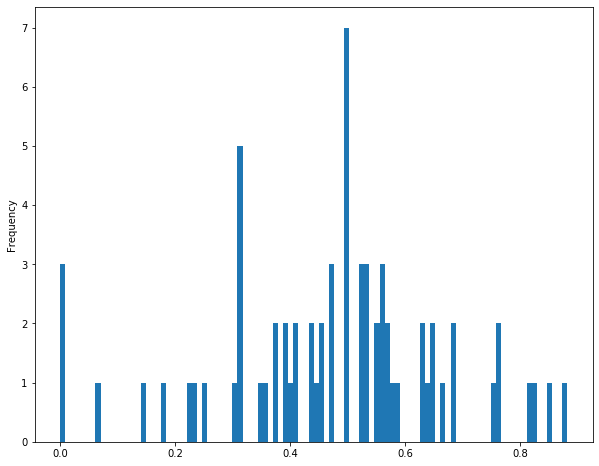

In [10]:
(df_elie
 .loc[df_elie.eventType.eq('display')]
 .join(other=(df_elie.loc[df_elie.eventType.eq('click')]
                     .set_index('impressionId')),
       on='impressionId',
       rsuffix='_clicks')
 .assign(timestamp=lambda df: pd.to_datetime(df.timestamp, unit='s'))
 .set_index('timestamp')
 .groupby([lambda df: df.minute, 'uid'])
 .count()
 .assign(rate=lambda df: df.uid_clicks / df.eventType)
 .loc[lambda df: df.eventType > 15, :]
#  .sort_values(by='rate',
#               ascending=False)
#  .head(25)
 .rate
 .plot(kind='hist', bins=100, figsize=(10, 8))
#  .hist(bins=100)
 
)

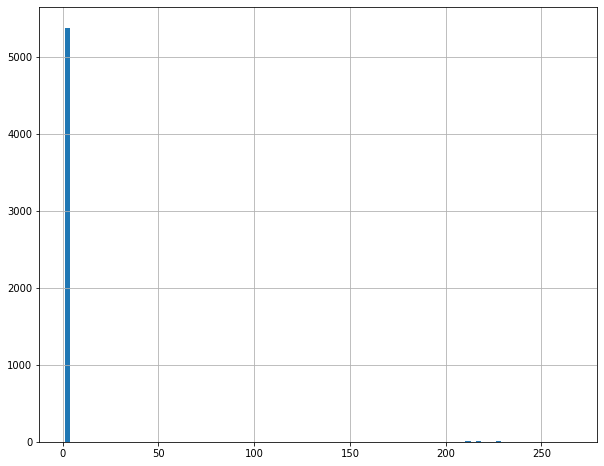

In [11]:
(df_elie
 .loc[df_elie.eventType.eq('click')]
 .groupby('uid')
 .count()
 .sort_values(by='eventType', ascending=False)
#  .head(25)
 .eventType
#  .plot
 .hist(bins=100, log=False, figsize=(10, 8))
)

In [12]:
outliers = (df_elie
 .loc[df_elie.eventType.eq('click')]
 .groupby('uid')
 .count()
 .sort_values(by='eventType', ascending=False)
 .eventType
 .ge(40)
 .loc[lambda x: x == True]
 .index
)

In [13]:
~df_elie.uid.isin(outliers)

0         True
1         True
2         True
3         True
4         True
         ...  
69687    False
69688     True
69689    False
69690     True
69691    False
Name: uid, Length: 69692, dtype: bool

In [14]:
(df_elie
 .loc[df_elie.eventType.eq('display') & ~df_elie.uid.isin(outliers)]
 .join(other=(df_elie.loc[df_elie.eventType.eq('click') & ~df_elie.uid.isin(outliers)]
                     .set_index('impressionId')),
       on='impressionId',
       rsuffix='_clicks')
 .assign(timestamp=lambda df: pd.to_datetime(df.timestamp, unit='s'))
 .set_index('timestamp')
 .groupby([lambda df: df.minute, 'uid'])
 .count()
 .assign(rate=lambda df: df.uid_clicks / df.eventType)
 .loc[lambda df: df.eventType > 0, :]
 .sort_values(by='eventType',
              ascending=False)
 .head(25)
#  .rate
#  .plot(kind='hist', bins=100, figsize=(10, 8))
#  .hist(bins=100)
 
)

eventType  ip  impressionId  \
   uid                                                                   
11 8df3df86-ee80-49fc-b772-7cb8b437a08a            2   2             2   
35 7a776e55-81a6-47db-a97b-448cf9ed03f1            2   2             2   
33 309bb902-eafb-4e6c-834d-3b1e68c1dcc7            2   2             2   
25 cf3e191e-e9e5-42e4-9d07-05faaed15c8a            2   2             2   
14 30e8b1c2-7d6c-4a3b-9c2a-e25b51e062b5            2   2             2   
13 77ecfcda-c3af-47ba-a086-ca269513c8a1            2   2             2   
   21421e95-8c9c-4a3c-a8d5-cb1ba722d9d1            2   2             2   
12 01711342-198f-49d5-945d-541fec3f92e3            2   2             2   
59 f1c77ba5-b626-4ec8-83f2-67f0f6547ea9            2   2             2   
28 8b885395-28a8-4acc-b615-6b945ac88b50            2   2             2   
39 2c682375-f25c-4039-a522-61fa2df0cbd1            1   1             1   
   277f5a10-8d80-47b3-9b4c-c10de60797b618          1   1             1   
   36787546-a9fe-4d9f-89de-90cafb1dd6fa            1   1             1   
   36279c6e-9689-440d-b6f5-9a3b81e1425e            1   1             1   
   35ff6bee-fca9-4503-86c7-866e96a560ae            1   1             1   
   35aedbbd-6859-428f-86b1-03c87ffa2dd6            1   1             1   
   29b81e49-2b6f-4d31-b1a7-3e82ce35fb27            1   1             1   
   29f45b27-e485-4dce-af54-b9c86db02a19            1   1             1   
   35a6999d-3efa-4f01-ace9-9fd0254cde28            1   1             1   
   2a76862e-bb47-44e6-90c6-d173768ee510            1   1             1   
   3407b534-95c1-41c5-9f78-f8b295d6cb6e            1   1             1   
   31fd586f-1cc4-46d6-b585-b8d484e2092a15          1   1             1   
   3068d3d0-33d6-4d32-bf0d-84660d3ddb10            1   1             1   
   303d3aa2-6cbb-471b-b1b0-1c9efde6ff01            1   1             1   
   2fdd6b89-b3b6-4b03-b27c-5f830a6e8067            1   1             1   

                                           eventType_clicks  uid_clicks  \
   uid                                                                    
11 8df3df86-ee80-49fc-b772-7cb8b437a08a                   2           2   
35 7a776e55-81a6-47db-a97b-448cf9ed03f1                   0           0   
33 309bb902-eafb-4e6c-834d-3b1e68c1dcc7                   0           0   
25 cf3e191e-e9e5-42e4-9d07-05faaed15c8a                   0           0   
14 30e8b1c2-7d6c-4a3b-9c2a-e25b51e062b5                   0           0   
13 77ecfcda-c3af-47ba-a086-ca269513c8a1                   0           0   
   21421e95-8c9c-4a3c-a8d5-cb1ba722d9d1                   0           0   
12 01711342-198f-49d5-945d-541fec3f92e3                   0           0   
59 f1c77ba5-b626-4ec8-83f2-67f0f6547ea9                   0           0   
28 8b885395-28a8-4acc-b615-6b945ac88b50                   0           0   
39 2c682375-f25c-4039-a522-61fa2df0cbd1                   0           0   
   277f5a10-8d80-47b3-9b4c-c10de60797b618                 1           1   
   36787546-a9fe-4d9f-89de-90cafb1dd6fa                   0           0   
   36279c6e-9689-440d-b6f5-9a3b81e1425e                   0           0   
   35ff6bee-fca9-4503-86c7-866e96a560ae                   0           0   
   35aedbbd-6859-428f-86b1-03c87ffa2dd6                   0           0   
   29b81e49-2b6f-4d31-b1a7-3e82ce35fb27                   0           0   
   29f45b27-e485-4dce-af54-b9c86db02a19                   0           0   
   35a6999d-3efa-4f01-ace9-9fd0254cde28                   0           0   
   2a76862e-bb47-44e6-90c6-d173768ee510                   0           0   
   3407b534-95c1-41c5-9f78-f8b295d6cb6e                   0           0   
   31fd586f-1cc4-46d6-b585-b8d484e2092a15                 1           1   
   3068d3d0-33d6-4d32-bf0d-84660d3ddb10                   0           0   
   303d3aa2-6cbb-471b-b1b0-1c9efde6ff01                   0           0   
   2fdd6b89-b3b6-4b03-b27c-5f830a6e8067                   0           0   

                  

In [28]:
df_elie.eventType == 'display'

0         True
1         True
2        False
3         True
4        False
         ...  
69687    False
69688     True
69689     True
69690     True
69691     True
Name: eventType, Length: 69692, dtype: bool

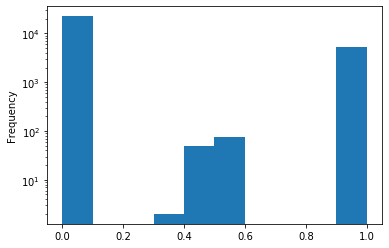

In [44]:
(df_elie
.loc[df_elie.eventType == 'display', ['eventType', 'uid']]
.groupby(['uid'])
.count()
.join((df_elie
        .loc[df_elie.eventType == 'click', ['eventType', 'uid']]
        .groupby(['uid'])
        .count()
        ), rsuffix='_right'
     ) 
.fillna(0)
.assign(rate=lambda df: df.eventType_right / df.eventType)
.rate
# .describe()
.plot(kind='hist', bins=10, log=True)
)